# 🦾 Elbow Method

El método del codo (o "elbow method" en inglés) es una **técnica utilizada en el contexto de algoritmos de clustering**, como K-Means, **para determinar el número óptimo de clusters en un conjunto de datos**. La idea principal detrás de este método es evaluar la variabilidad dentro de los clusters para diferentes valores de K (número de clusters) y observar en qué punto se produce una disminución significativamente menor en la variabilidad. Visualmente, este punto puede parecerse a un "codo" en el gráfico.

Aquí hay una descripción general de cómo se aplica el método del codo en el contexto de K-Means clustering:

1. **Ejecutar K-Means para diferentes valores de K:** Se ejecuta el algoritmo K-Means para varios valores de K (por ejemplo, desde K=1 hasta un valor máximo predefinido).

2. **Calcular la variabilidad intra-cluster:** Después de ejecutar K-Means para cada valor de K, se calcula la variabilidad intra-cluster para cada configuración de K. La variabilidad intra-cluster es una medida de la dispersión de los puntos dentro de cada cluster. Una métrica común para esto es la suma de los cuadrados de las distancias euclidianas entre los puntos y el centroide de su respectivo cluster.

3. **Graficar la variabilidad en función de K:** Se crea un gráfico donde el eje x representa el número de clusters (K) y el eje y representa la variabilidad intra-cluster. Este gráfico puede mostrar una disminución inicial rápida de la variabilidad que luego se estabiliza. El punto en el que la tasa de disminución de la variabilidad disminuye significativamente a menudo se denomina "codo".

4. **Seleccionar el punto del codo:** El número óptimo de clusters se elige observando el gráfico y seleccionando el valor de K en el que se produce el codo. En este punto, añadir más clusters ya no proporciona una mejora significativa en la reducción de la variabilidad intra-cluster.

Es importante tener en cuenta que el método del codo es una heurística y no siempre es fácil identificar un codo claro en el gráfico. Además, en algunos casos, puede no haber un codo evidente, y la elección del número óptimo de clusters puede requerir considerar otras métricas y técnicas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics

In [2]:
# Crear un conjunto de datos de ejemplo
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Convertir el conjunto de datos en un DataFrame de Pandas
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df

,Feature1,Feature2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437
...,...,...
295,-3.660191,9.389984
296,3.810884,1.412989
297,-4.116681,9.198920
298,-8.819909,8.999960


In [3]:
# Inicializar una lista para almacenar las variabilidades intra-cluster
inertia_values = []

In [4]:
# Probar diferentes valores de K (número de clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)
    
# n_init = Number of times the k-means algorithm is run with different centroid seeds

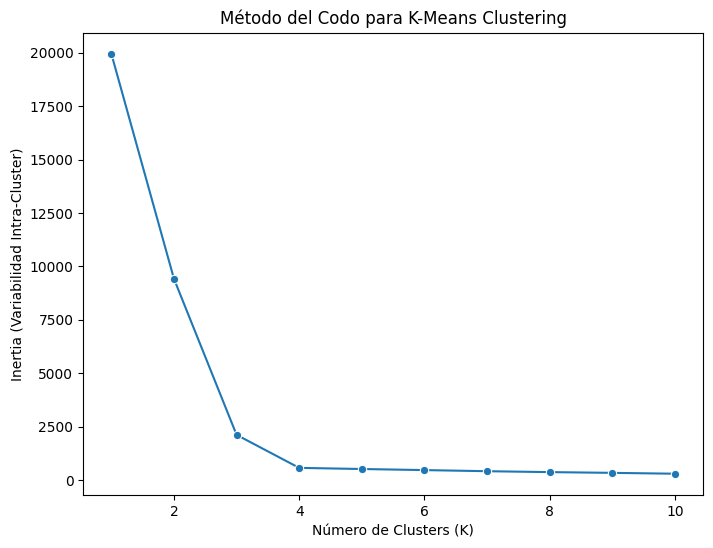

In [5]:
# Crear un gráfico de codo
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 11), y=inertia_values, marker='o')
plt.title('Método del Codo para K-Means Clustering')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia (Variabilidad Intra-Cluster)')
plt.show()